## <p style="text-align: center;">Отчет по курсовой работе</p>
<p style="text-align: center;">Кайсин Антон, 491 группа</p>

### Задание:
* Необходимо построить поле скоростей и поле деформации региона по данным ГНСС станций

### Ход работы:

Буду использовать библиотеку `pygmt` для `python` от `Generic Mapping Tools`. Для начала установим ее.

In [1]:
!pip install pygmt[all]

Импортирую нужные библиотеки для работы.

In [2]:
import pandas as pd
import numpy as np
import pygmt 
import numpy as np
import warnings

Занесем данные ГНСС станций в словарь.

In [3]:
data = \
{'station': ['SVTL RU', 'PULK RU', 'PULJ RU', 'SPTR RU', 'PUL1 RU', 'SPBU RU', 'BNTA RU', 'TL60 RU', 'GOGL RU', 'VYBO RU', 'VASO RU', 'PETR RU', 'FONT RU', 'LOM2 RU', 'PRV2 RU', 'SEST RU', 'PUSH RU', 'SVED RU', 'MURN RU', 'KUP2 RU', 'GORN RU', 'METS FI', 'VIRO FI', 'TUOR FI', 'SUUR ES', 'KURE ES', 'TOIL ES', 'TORA ES'],
'period': ['1997–2014', '2002–2014', '2008–2012', '2006–2014', '1993–2011', '2006–2014', '2012–2014', '2012–2014', '1994–2012', '1993–1997', '2012–2014', '2012–2014', '2012–2014', '2012–2014', '2012–2014', '2012–2014', '2012–2014', '2012–2014', '2012–2014', '2012–2014', '2012–2014', '1993–2014', '1999–2013', '2006–2013', '1996–2014', '2008–2014', '2008–2014', '2008–2014'],
'days' : ['6276', '4398', '1130', '2456','71','2486','738','747','11','14','794','724','636','624','613','648','669','702','600','699','682','7352','1839','2543','6060','2325','2329','2163'],
'VE': [0.37, 0.34, 0.02, 0.05, -0.10, -0.25, -0.95, -0.53, 0.18, -0.18,-0.61,-0.44, 0.53,-0.26,0.51,-0.85,-0.24,-0.20,-0.86,-0.96,-0.94,0.45, 0.36, 0.56,-0.01, 0.05,0.07,-0.12],
'sigma_ve': ['0.007', '0.008', '0.052', '0.020', '0.053', '0.016', '0.128', '0.121',
       '0.046', '0.594', '0.093', '0.082', '0.093', '0.126', '0.136',
       '0.139', '0.117', '0.119', '0.143', '0.132', '0.117', '0.005',
       '0.016', '0.020', '0.006', '0.022', '0.021', '0.025'],
'VN': ['-0.93', '-0.86', '-0.90', '-0.34', '-0.43', '-1.23', '-1.36',
       '-2.77', '-1.00', '-0.84', '0.27', '-1.32', '-1.42', '0.18',
       '-0.92', '0.30', '-0.55', '-0.16', '-0.53', '-0.93', '0.27',
       '-1.00', '-1.20', '-1.22', '-0.98', '-1.17', '-0.60', '-1.18'],
'sigma_vn': ['0.007', '0.009', '0.056', '0.023', '0.073', '0.019', '0.134', '0.143',
       '0.214', '0.354', '0.083', '0.091', '0.112', '0.138', '0.125',
       '0.126', '0.126', '0.126', '0.133', '0.123', '0.117', '0.005',
       '0.018', '0.019', '0.008', '0.018', '0.024', '0.021'],
'latitude' : [60.533,59.772,59.772,59.772,59.772,59.942,59.922,59.538,60.086,60.725,59.943,59.891,59.919,59.891,60.173,60.120,59.739,59.792,60.058,59.888,59.931,60.217,60.539,60.462,59.464,58.256,59.422,58.265],
'longitude' : [29.781,30.328,30.328,30.328,30.328,30.295,30.282,30.884,26.974,28.696,30.273,29.842,30.309,29.786,29.455,29.952,30.390,30.675,30.454,30.375,30.267,24.395,27.555,22.358,24.367,22.510,27.537,26.466],
}

Проведем небольшую предобработку и занесем все в один датафрейм.

In [4]:
df = pd.DataFrame(data)
df['days'] = df['days'].astype(float)
df['VE'] = df['VE'].astype(float)
df['sigma_ve'] = df['sigma_ve'].astype(float)
df['VN'] = df['VN'].astype(float)
df['sigma_vn'] = df['sigma_vn'].astype(float)

stat = df.station.str.split(' ')
df['name_station'] = stat.map(lambda x: x[0])
df['country'] = stat.map(lambda x: x[1])
df = df.drop(columns='station',axis=1)
df.head()

,period,days,VE,sigma_ve,VN,sigma_vn,latitude,longitude,name_station,country
0,1997–2014,6276.0,0.37,0.007,-0.93,0.007,60.533,29.781,SVTL,RU
1,2002–2014,4398.0,0.34,0.008,-0.86,0.009,59.772,30.328,PULK,RU
2,2008–2012,1130.0,0.02,0.052,-0.90,0.056,59.772,30.328,PULJ,RU
3,2006–2014,2456.0,0.05,0.020,-0.34,0.023,59.772,30.328,SPTR,RU
4,1993–2011,71.0,-0.10,0.053,-0.43,0.073,59.772,30.328,PUL1,RU


Описание данных:
* `period` - период в годах
* `days` - количество дней
* `VE` - скорость в направлении на восток
* `sigma_ve` - ошибка скорости в направлении на восток
* `VN`- скорость в направлении на север
* `sigma_vn` - ошибка скорости в направлении на север
* `latitude` - широта
* `longitude` - долгота
* `name_station` - название станции
* `country` - страна


### Поле скоростей
Для начала выберем регион и найдем направления и длины векторов скоростей.

In [5]:
region = [
    df.longitude.min() - 1,
    df.longitude.max() + 1,
    df.latitude.min() - 1,
    df.latitude.max() + 1,
]
north_velocities = df['VN'].to_numpy()
east_velocities = df['VE'].to_numpy()
direction = np.rad2deg(np.arctan2(north_velocities,east_velocities))
lengths = np.sqrt(north_velocities**2 + east_velocities**2)

Построим полученные вектора на карте.

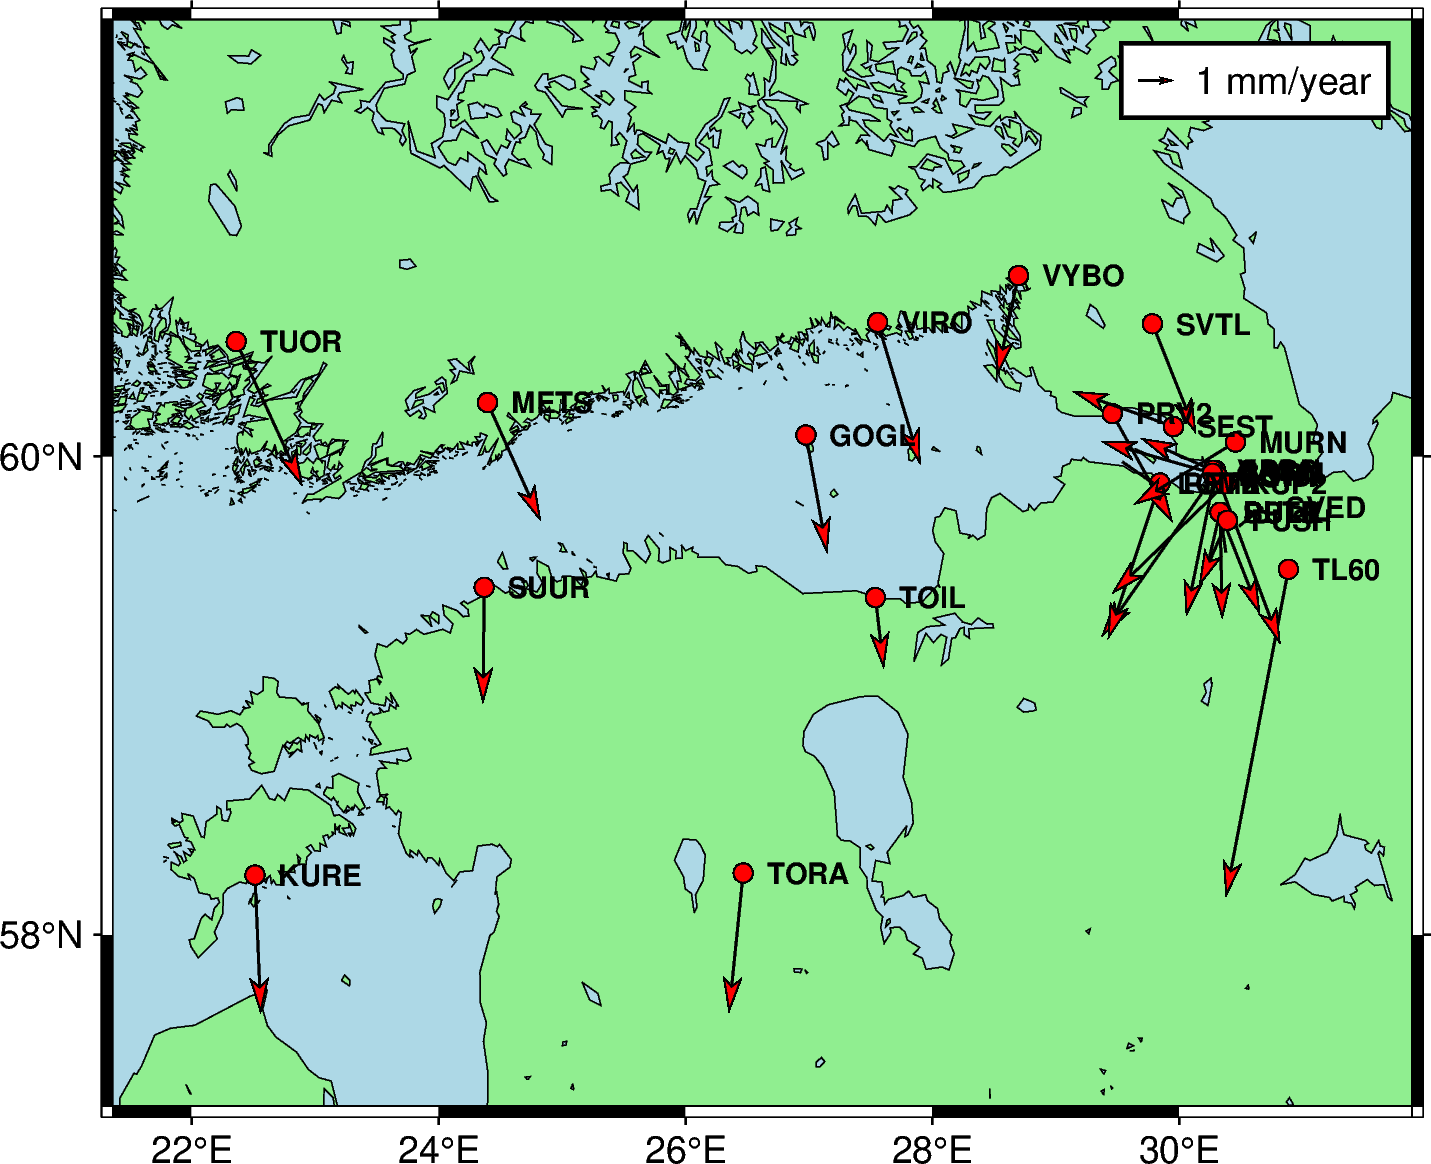

In [7]:
fig = pygmt.Figure()
fig.coast(region=region, 
          projection="M11c",
          land="lightgreen", 
          water="lightblue", 
          shorelines=True,
          frame='a')
fig.plot(x=df.longitude, 
         y=df.latitude, 
         style="v0.3c+ea+bc",
         direction=[direction, lengths],
         fill="red", 
         pen='0.6p',
         label = '1 mm/year')

fig.legend()
fig.text(x=df.longitude, 
         y=df.latitude, 
        text=df.name_station, font="7p,Helvetica-Bold", justify="LM", offset="0.2c/0c")
fig.show()

Можно заметить некоторые особенности в характере поля остаточных скоростей исследуемого региона: 

1. Заметен разворот по часовой стрелке (к западу) скоростей станций на южном берегу Финского залива по отношению к северным станциям 
2. Скорости станций в непосредственной близости к Петербургу в среднем в еще большей степени отклоняются к западу
3. Эти станции имеют больший разброс направлений скоростей

### Найдем поле деформации

Для начала напишем функцию `distance(coord1, coord2)`, которая вычисляет расстояние (в километрах) между двумя точками на поверхности Земли, заданными с помощью координат их широты и долготы.

In [8]:
from math import sin, cos, sqrt, atan2, radians
def distance(coord1, coord2):
    R = 6373.3  # радиус Земли в км
    lat1, lon1 = radians(coord1[0]), radians(coord1[1])
    lat2, lon2 = radians(coord2[0]), radians(coord2[1])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    return R * c

Чтобы найти тензор деформации D, была написана фунция `field_deform(point)`.


Для заданной точки поля деформаций можно записать
$$ v = L\Delta x + v_{0}, $$
где 
$$ v_{0} = \left(
\begin{matrix}
v_{0N} & v_{0N} & \dots \\
v_{0E} & v_{0E} & \dots \\
\end{matrix} \right)
$$
— матрица, образованная компонентами скорости в точке;
$$ \Delta x_{2 \times n} = \left(
\begin{matrix}
\Delta x_{1N} & \Delta x_{2N} & \dots \\
\Delta x_{1E} & \Delta x_{2E} & \dots \\
\end{matrix} \right)
$$
— матрица разностей координат между точкой и n станциями;
$$ L = \left(
\begin{matrix}
\frac{\partial v_{n}}{\partial x_{n}} & \frac{\partial v_{n}}{\partial x_{e}} \\
& \\
\frac{\partial v_{e}}{\partial x_{n}} & \frac{\partial v_{e}}{\partial x_{e}} \\
\end{matrix} \right)
$$
— градиент вектора скорости.

Задача нахождения элементов матрицы L приближенно решается с помощью
взвешенного МНК:

$$ 
u^{T} = \{v_{0N} , v_{0E}, L_{11}, L_{12}, L_{21}, L_{22}\}
$$
— искомый вектор,

$$
\hat{u} = (A^{T}WA)^{-1}A^{T}Wv^{T},
$$
где 
$$ A = \left(
\begin{matrix}
1 & 0 &\Delta x_{1N} &\Delta x_{1E} &0 &0 \\
0 & 1 &0 &0 &\Delta x_{1N} &\Delta x_{1E} \\
\dots & \dots &\dots &\dots &\dots &\dots \\
1 & 0 &\Delta x_{1N} &\Delta x_{1E} &0 &0 \\
0 & 1 &0 &0 &\Delta x_{1N} &\Delta x_{1E} \\
\end{matrix} \right),
$$

$$
v^{T}_{1 \times 2n} = \{v_{1N}, v_{1E}, \dots\} 
$$,

$$ 
W_{2n \times 2n} = diag\left(f(\frac{d1}{d0}\sigma_{v1N}^{-2}), f(\frac{d1}{d0}\sigma_{v1E}^{-2}), f(\frac{d2}{d0}\sigma_{v2N}^{-2}), f(\frac{d2}{d0}\sigma_{v2N}^{-2}, \dots)\right) 
$$

$$ 
f(\frac{d_{i}}{d_{0}}) = e^{-\frac{d_{i}}{d_{0}}}
$$
— масштабирующая функция, характеризующая степень значимости i-й станции в зависимости от расстояния до заданной точки $d_{i}$, $d_{0} = 75$ — масштабный параметр.

Квадратную матрицу градиента скоростей можно представить как сумму симметричной и антисимметричной матриц соответственно тензора деформации $D$ и тензора вращения твердого тела $\Omega$:
$$ L = D + \Omega $$

$$ \left(
\begin{matrix}
\frac{\partial v_{n}}{\partial x_{n}} & \frac{\partial v_{n}}{\partial x_{e}} \\
& \\
\frac{\partial v_{e}}{\partial x_{n}} & \frac{\partial v_{e}}{\partial x_{e}} \\

\end{matrix} \right)
 = 
\left(
\begin{matrix}
\frac{\partial v_{n}}{\partial x_{n}} & \frac{\partial v_{n}}{\partial x_{e}} + \frac{\partial v_{e}}{\partial x_{n}}\\
& \\
\frac{\partial v_{e}}{\partial x_{n}} + \frac{\partial v_{n}}{\partial x_{e}} & \frac{\partial v_{e}}{\partial x_{e}} \\

\end{matrix} \right)
+ 
\left(
\begin{matrix}
\frac{\partial v_{n}}{\partial x_{n}} & \frac{\partial v_{n}}{\partial x_{e}} - \frac{\partial v_{e}}{\partial x_{n}}\\
& \\
\frac{\partial v_{e}}{\partial x_{n}} - \frac{\partial v_{n}}{\partial x_{e}} & \frac{\partial v_{e}}{\partial x_{e}} \\

\end{matrix} \right)
$$ 

Наибольшее и наименьшее собственные числа тензора D характеризуют максимум и минимум величины напряжения в данной точке, а его собственные векторы,соотвественно, — направления этих напряжений. Напряжение имеет размерность относительного удлинения за единицу времени.

In [9]:
def field_deform(point):

    # задаем скорости станций и точки
    V = df[['VN','VE']].to_numpy().T
    #V0 = np.zeros((2,len(df)))

    #разности координат станций и точки 
    delta_e = df['longitude'] - point[0]
    delta_n = df['latitude'] - point[1]
    delta_x = np.array([delta_n.to_numpy(), delta_e.to_numpy()])
    
    #заполняем матрицу А
    A = np.zeros((56,6))
    for i in range(len(df)):
        A[2*i] = [1, 0, delta_x[0][i], delta_x[1][i], 0, 0]
        A[2*i+1] = [0, 1, 0, 0, delta_x[0][i], delta_x[1][i]]
    
    d0 = 75

    #di - расстояния от станции до заданной точки
    d = np.array([])
    stations = df[['latitude', 'longitude']].values  
    d = np.zeros(stations.shape[0])  # массив расстояний от точки до каждой станции
    for i, station in enumerate(stations):
        dist = distance(point, station)
        d[i] = dist

    #f - масштабирующая функция
    f = lambda x: np.exp(-x/d0)

    #Посчитаем W
    sigma_vn = df['sigma_vn'].to_numpy()
    sigma_ve = df['sigma_ve'].to_numpy()
    W = np.zeros((len(df)*2, len(df)*2))
    for i in range(len(df)):
            d_i = d[i]  # расстояние от станции до заданной точки
            f_d_i = f(d_i/d0)  # значение масштабирующей функции для данного расстояния
            W[2*i, 2*i] = f_d_i / (sigma_vn[i]**2)
            W[2*i+1, 2*i+1] = f_d_i / (sigma_ve[i]**2)
    
    # рассчитываем коэффициенты ub по формуле ub = (A.T * W * A)^-1 * A.T * W * v
    A_transpose = A.T
    ATA_inv = np.linalg.inv(A_transpose @ W @ A)
    u = ATA_inv @ A_transpose @ W @ V.reshape(-1).reshape(1, -1).T
    return u

Для начала введем сетку по долготе и широте и сделаем из нее вектор узлов `points`

In [11]:
import numpy as np

# задаем диапазоны значений и шаг сетки
lon_start = 21.358
lon_stop = 31.884
lon_step = 0.8
lat_start = 57.256
lat_stop = 67.782
lat_step = 0.47

# создаем одномерные массивы координат по долготе и широте
lon_arr = np.arange(lon_start, lon_stop, lon_step)
lat_arr = np.arange(lat_start, lat_stop, lat_step)

# создаем сетку координат с помощью функции meshgrid
lon_grid, lat_grid = np.meshgrid(lon_arr, lat_arr)
coord_matrix = np.stack((lon_grid,lat_grid), axis=-1)
points = coord_matrix.reshape(-1,2).tolist()


Затем для каждой точки посчитаем тензор деформации и найдем собственные вектора и собственные числа

In [12]:
#Цикл для всех узлов
min_eigenvalues = []
max_eigenvalues = []
way_eigenvectors = [] # собственные вектора
all_eigenvalues = [] # собственные числа

for i, point in enumerate(points):
    D = np.array([[field_deform(point)[2][0], field_deform(point)[3][0] + field_deform(point)[4][0]], 
                [field_deform(point)[3][0] + field_deform(point)[4][0], field_deform(point)[5][0]]])
    try:
        eigenvalues, eigenvectors = np.linalg.eig(D)
        min_eigenvalues.append(min(eigenvalues))
        max_eigenvalues.append(max(eigenvalues))
        all_eigenvalues.append(eigenvalues)
        way_eigenvectors.append(eigenvectors)
    except Exception as e:
        print(f"Error at point {point}, index = {i}: {e}")
        del points[i]
    

Вычислим азимут для всех собственных векторов.

In [14]:
azim = []
for i in range(len(all_eigenvalues)):
    azim.append(way_eigenvectors[i][0])

In [15]:
azimut = []
for i in range(len(azim)):
    azimut.append( np.rad2deg(np.arctan2(azim[i][1],azim[i][0])))


In [21]:
data_D = pd.DataFrame(points, columns=['longitude', 'latitude']) 

data_D['eps1'] = max_eigenvalues
data_D['eps2'] = min_eigenvalues
data_D['azimut'] = 180 - np.array(azimut)
data_D = data_D.query('latitude <= 61.725')


Построим полученное поле деформации используя функцию `pygmt.Figure.velo`

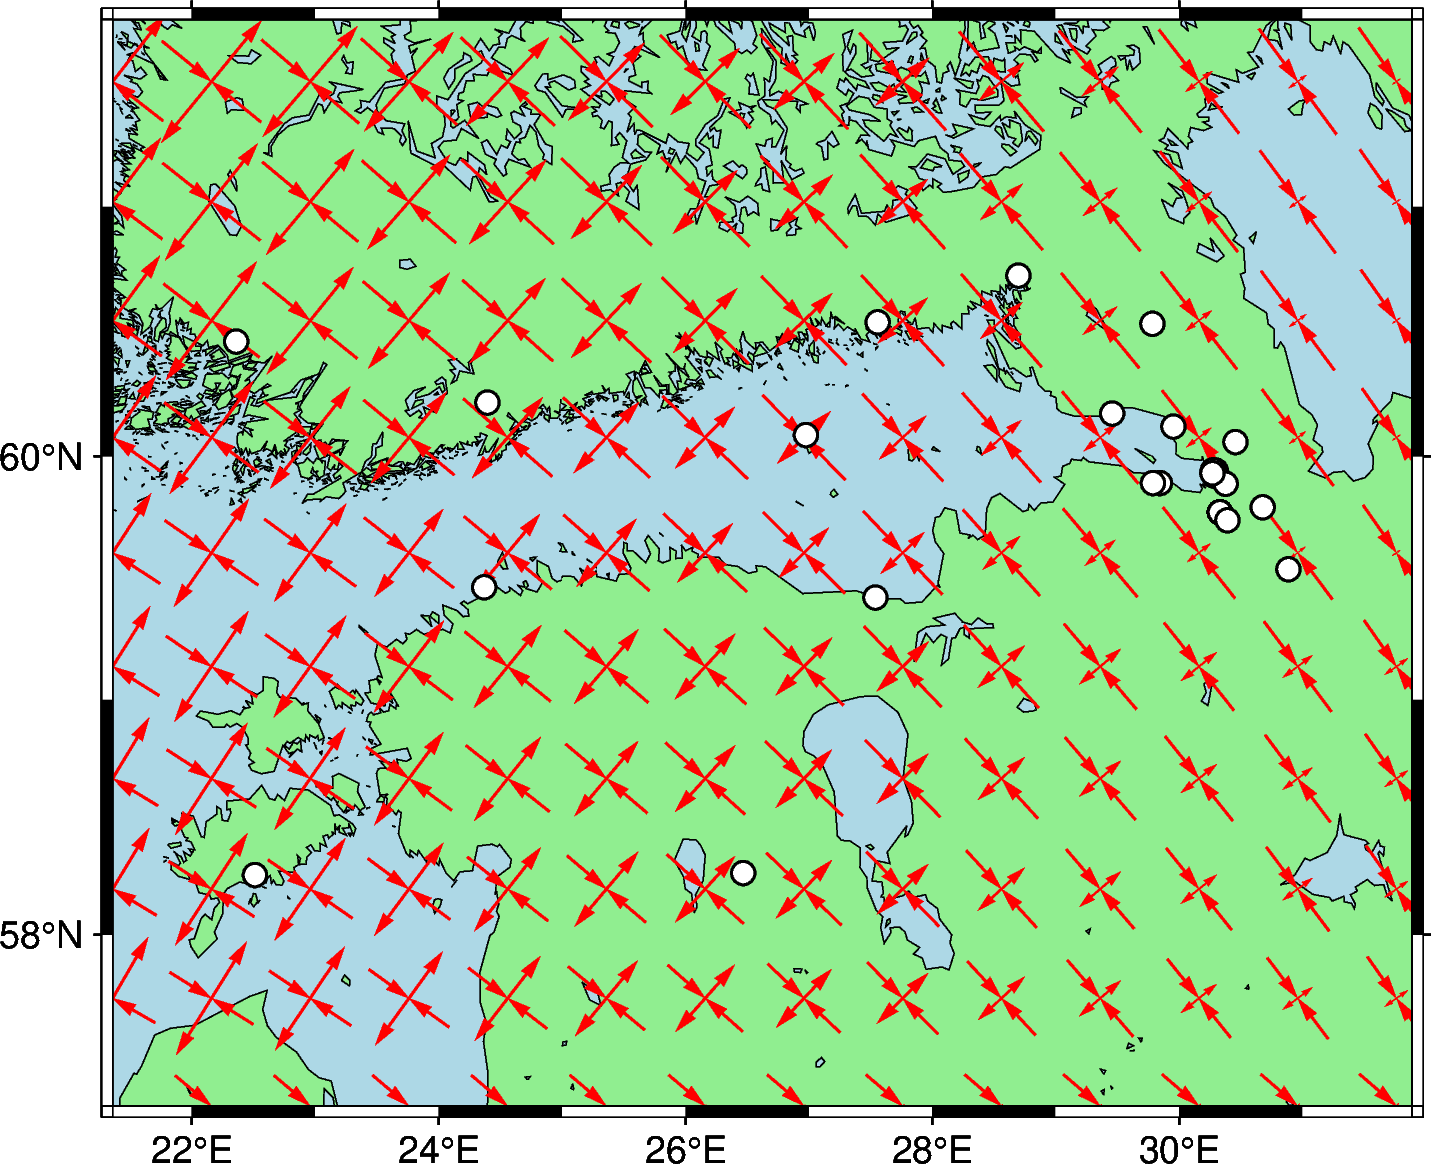

In [97]:
fig = pygmt.Figure()
fig.coast(region=region, 
          projection="M11c",
          land="lightgreen", 
          water="lightblue", 
          shorelines=True,
          frame='a')
fig.velo(
    data=data_D,
    region=region,
    pen="0.6p,red",
    uncertaintyfill="lightblue1",
    line=True,
    spec="x0.4",
    frame="af",
    projection="M11c",
    vector="0.2c+p1p+e+gred"
)
fig.plot(x=df.longitude, 
         y=df.latitude, 
         style="c0.2",
         fill="White", 
         pen='0.6p')
fig.show()

Видно слабое сжатие региона в направлении с северо-запада на юговосток. 

### Заключение:
Было получено поле скоростей и поле деформации региона. 

У `поля скоростей` заметен разворот по часовой стрелке скоростей станций на южном берегу Финского залива по отношению к северным станциям, также скорости станций в непосредственной близости к Петербургу в среднем в еще большей степени отклоняются к западу, а также эти станции имеют больший разброс направлений скоростей. 

Для `поля деформации` видно слабое сжатие региона в направлении с северо-запада на юговосток. 